Цель: Обучить модель "Дерево решений" и проверить её точность.

На данном этапе здесь будут подключаться все необходимые библиотеки для работы с датасетом и различными вариантами кодирования, а также для построения дерева решений и разделение датасета.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

С помощью функции read_csv происходит подключение и чтение нового файла с работой "vgsales_51.csv", который не содержит пустых строк, сжеданных в работе №1.

In [91]:
df = pd.read_csv("vgsales_51.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Other_Sales,Global_Sales
0,13368,Gitaroo Man,PS2,2001.0,Misc,THQ,0.02,0.02,0.01,0.05
1,11518,Shonen Jump's One Piece: Pirates Carnival,GC,2005.0,Misc,Namco Bandai Games,0.06,0.02,0.00,0.08
2,14741,Pro Evolution Soccer 2017,XOne,2016.0,Sports,Konami Digital Entertainment,0.00,0.02,0.00,0.03
3,7072,Naruto Shippuden: Ninja Council 4,DS,2007.0,Action,Nintendo,0.09,0.00,0.01,0.23
4,7124,The Magic School Bus: Oceans,DS,2011.0,Adventure,Scholastic Inc.,0.21,0.00,0.01,0.23
...,...,...,...,...,...,...,...,...,...,...
548,6186,Hot Wheels: Track Attack,DS,2010.0,Racing,THQ,0.18,0.08,0.02,0.28
549,10786,Ar tonelico: Melody of Elemia,PS2,2006.0,Role-Playing,505 Games,0.00,0.00,0.00,0.10
550,7594,"Ni Hao, Kai-lan: New Year's Celebration",DS,2009.0,Misc,Take-Two Interactive,0.19,0.00,0.01,0.20
551,11237,Petz: Saddle Club,PSP,2009.0,Simulation,Ubisoft,0.08,0.00,0.01,0.09


Затем необходимо все словесные значения из набора данных преобразовать в бинарные, для этого будем использовать кодирование из прошлой практической работы - OrdinalEncoder, а столбец Genre преобразовать через OneHotEncoder, потому что там меньше всего уникальных значений и можно использовать 0 и 1. И в качестве единицы юудет элемент Action из-за того, что он идет по алфавиту первый, а в качестве нуля все остальные жанры. Через fit_transform преобразовываем старые данные в новые.

In [92]:
OE = OrdinalEncoder()
df[['Name', 'Platform', 'Year', 'Publisher']] = OE.fit_transform(df[['Name', 'Platform', 'Year', 'Publisher']])
OHE = OneHotEncoder()
df['Genre'] = OHE.fit_transform(df[['Genre']]).toarray()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Other_Sales,Global_Sales
0,13368,170.0,12.0,15.0,0.0,113.0,0.02,0.02,0.01,0.05
1,11518,383.0,6.0,19.0,0.0,78.0,0.06,0.02,0.00,0.08
2,14741,346.0,24.0,31.0,0.0,62.0,0.00,0.02,0.00,0.03
3,7072,305.0,3.0,22.0,1.0,80.0,0.09,0.00,0.01,0.23
4,7124,445.0,3.0,26.0,0.0,99.0,0.21,0.00,0.01,0.23
...,...,...,...,...,...,...,...,...,...,...
548,6186,202.0,3.0,25.0,0.0,113.0,0.18,0.08,0.02,0.28
549,10786,21.0,12.0,20.0,0.0,2.0,0.00,0.00,0.00,0.10
550,7594,310.0,3.0,24.0,0.0,115.0,0.19,0.00,0.01,0.20
551,11237,327.0,15.0,24.0,0.0,123.0,0.08,0.00,0.01,0.09


Теперь разделим датасет на две части. Для этого установим главным параметр Genre, которую присвоим в одни из переменных/осей с обучаемыми данными, а в другую выберем тот же самый столбец, но теперь исключим его с помощью функции drop для тестовых данных. После осталось разбить на выборки с помощью функции train_test_split, а в параметрах укажем начальное состояния генератора чисел и данные выделенные для тестирования.

In [93]:
Y = df['Genre']
X = df.drop(columns='Genre')

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

Теперь по примеру работы на паре необходимо обучить данные с помощью DecisionTreeClassifier, указав взятие каждых 25 строк. Функция fit вычисляет формулировку для преобразования столбцов на основе стандартного масштабирования, но не применяет фактическое преобразование, поэтому записываем его в переменную.

In [94]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)

Не используя гиперпараметры, оставляем пустоты в скобках DecisionTreeClassifier.

In [95]:
dtc_plot = DecisionTreeClassifier()
dtc_plot = dtc_plot.fit(x_train.iloc[::25], y_train[::25])

После создаём дерево решений с помощью dtc_plot и использованием функции figure, в который входит параметр с размером фигур. filled - разрешает использование цветовых фрагментов. fontsize - размер выводимого шрифта.

[Text(0.6666666666666666, 0.9166666666666666, 'x[7] <= 0.05\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.5, 0.75, 'x[4] <= 126.5\ngini = 0.375\nsamples = 16\nvalue = [12, 4]'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[8] <= 0.015\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(0.16666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.4166666666666667, 'x[3] <= 18.5\ngini = 0.245\nsamples = 14\nvalue = [12, 2]'),
 Text(0.3333333333333333, 0.25, 'x[1] <= 317.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.6666666666666666, 0.5833333333333334, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

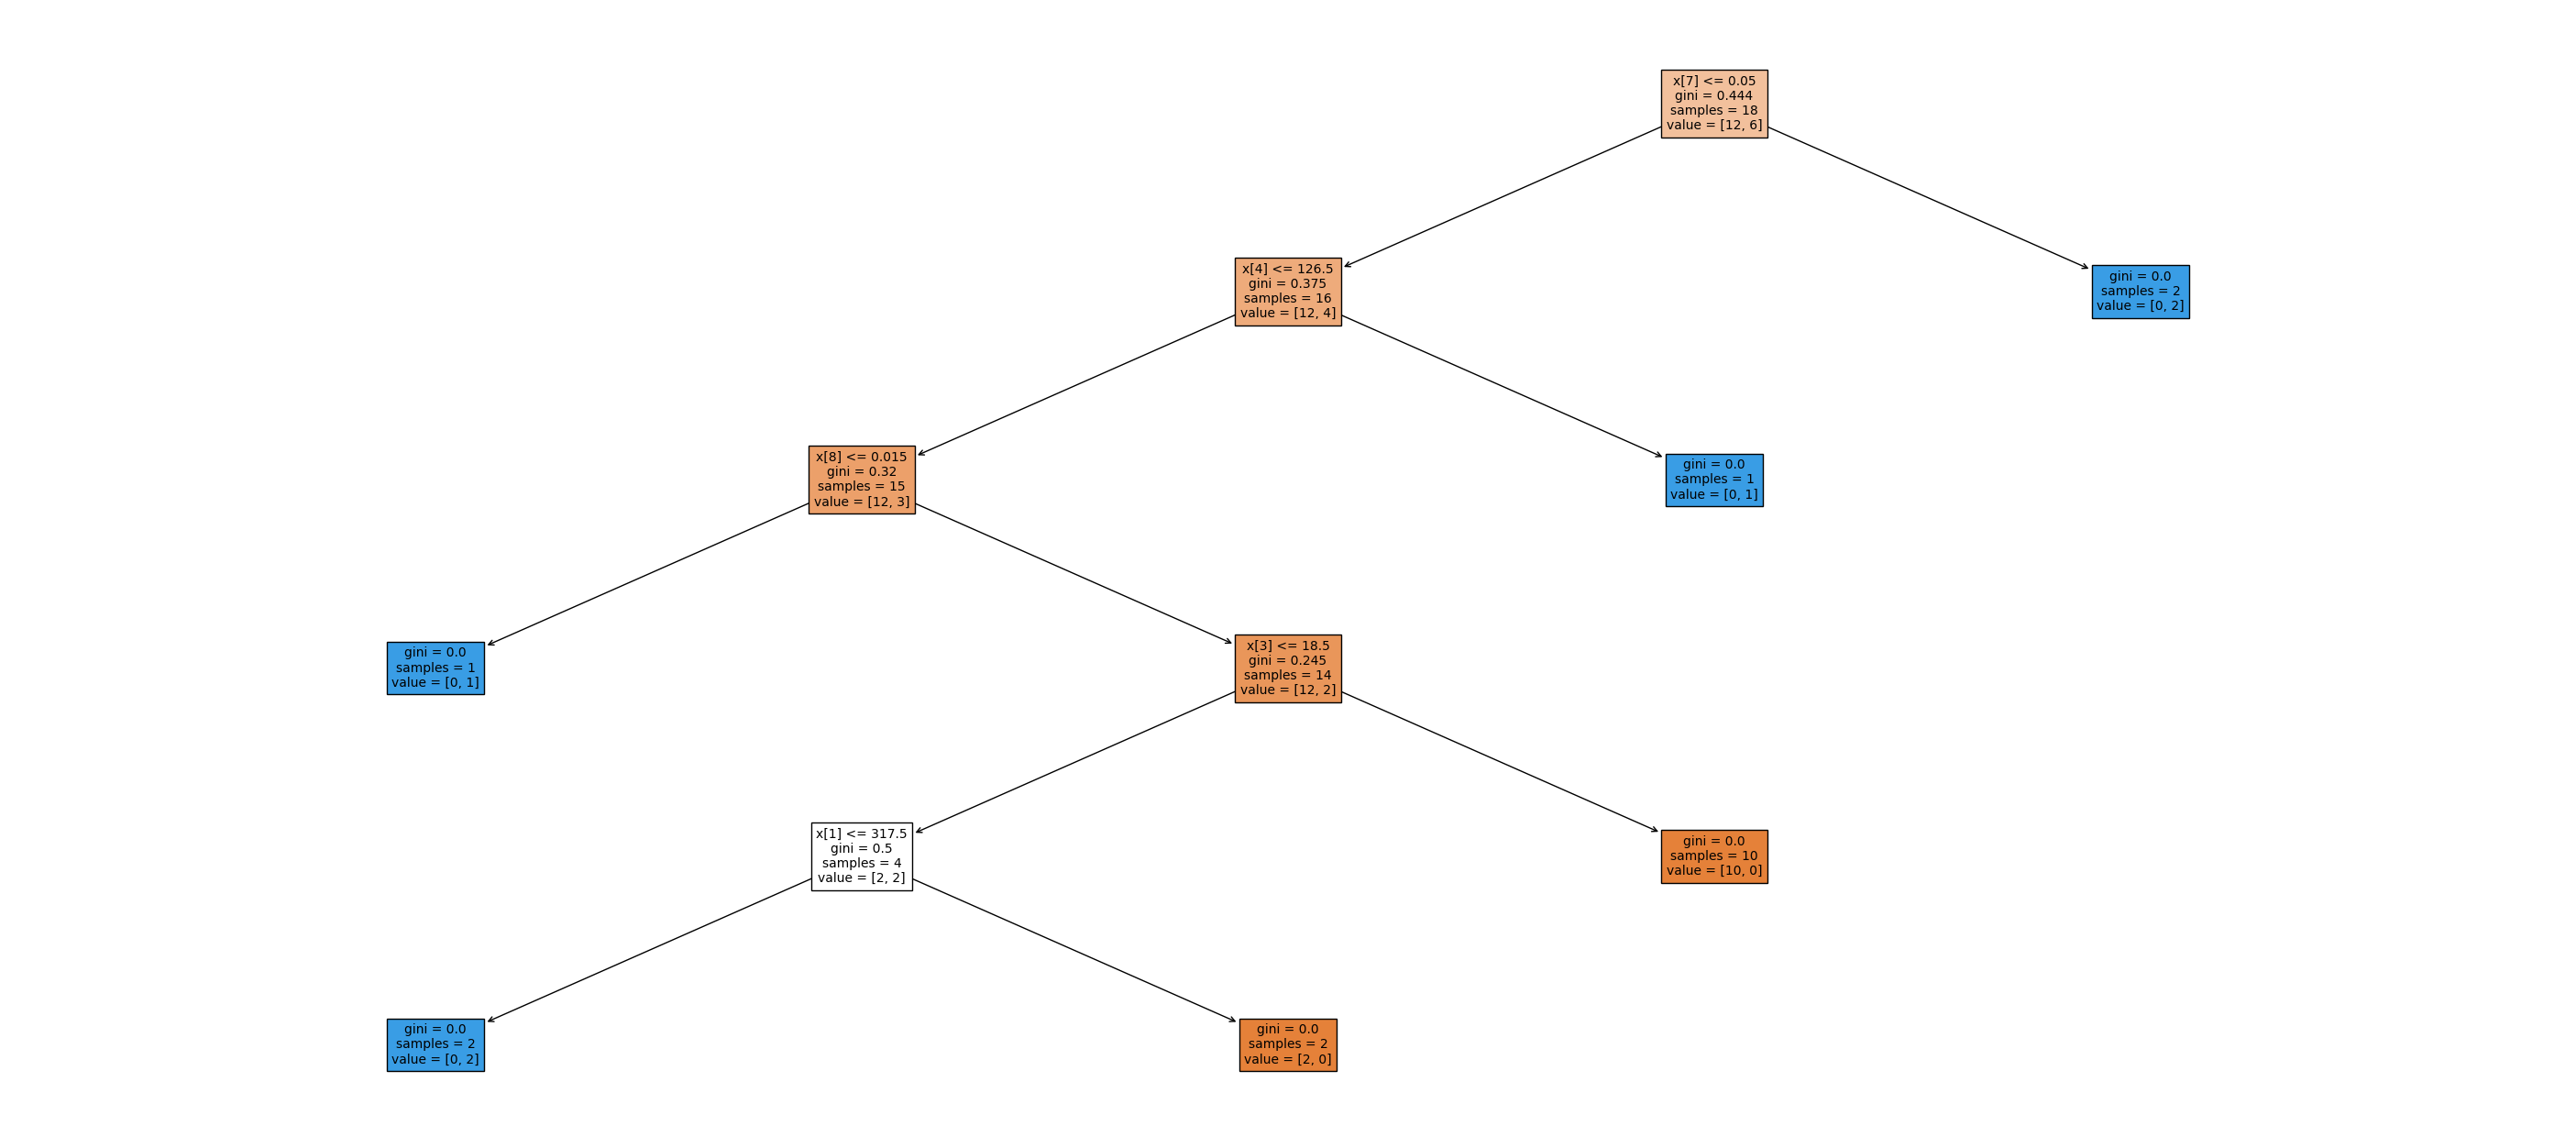

In [96]:
plt.figure(figsize=(36,16))
tree.plot_tree(dtc_plot, filled=True, fontsize=10)

Затем происходит использование метрик по заданию, и производится анализ точности данных предсказанний и их исходов с помощью выведенных данных на тепловой карты из прошлых практических работ. С помощью данной тепловой карты были следующие данные - ~69 раз было предсказно правильно, что будет не нужный жанр и 7 раз, что он нужный. ~20 раз было предсказно неправильно, что будет не нужный жанр и 15 раз, что он нужный.

Text(50.722222222222214, 0.5, 'Реально')

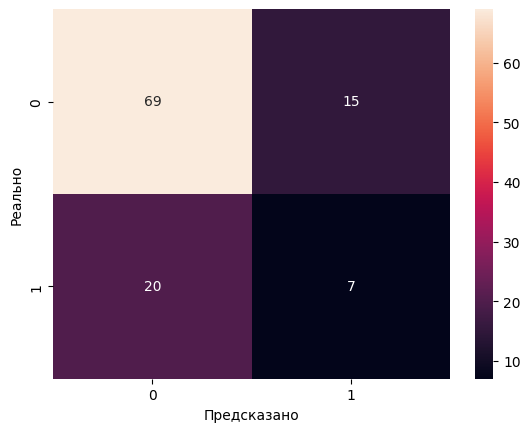

In [97]:
Y_predict = dtc.predict(x_test)
con_mat = metrics.confusion_matrix(y_test, Y_predict)
sns.heatmap(con_mat, annot=True, fmt="d")
plt.xlabel("Предсказано")
plt.ylabel("Реально")

С помощью метрики узнали следующие данные: (-)Точность - 68%,   представляет собой долю правильных предсказаний. (-)Чувствительность - 26%, правильно определяет около 26% фактических положительных случаев. (-)Аккуратность  - 32%, предсказанных положительных случаев являются правильными. (-) Финальная - 29%, баланс модели между точностью и чувствительностью.

In [98]:
print("Точность", metrics.accuracy_score(y_test, Y_predict))
print("Чувствительность", metrics.recall_score(y_test, Y_predict))
print("Аккуратность", metrics.precision_score(y_test, Y_predict))
print("Финальная", metrics.f1_score(y_test, Y_predict))

Точность 0.6846846846846847
Чувствительность 0.25925925925925924
Аккуратность 0.3181818181818182
Финальная 0.2857142857142857


Теперь по заданию необходимо проделать снова обучение данных, но на этот раз обучить, построить и проверить метрику Дерева решений с помощью гиперпараметрами, повторив тот же самый алгоритм разделения датасета на обучающую и тестовую часть.

In [99]:
Y = df['Genre']
X = df.drop(columns='Genre')

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

За гиперпараметры пойдут: max_depth, min_samples_leaf, max_leaf_nodes. Для уменьшения возможных элементов по заданным элементам по заданным парамаетрам. 

In [100]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train, y_train)
dtc_plot = DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, max_leaf_nodes=200)
dtc_plot = dtc_plot.fit(x_train.iloc[::25], y_train.iloc[::25])

Теперь также обратимся к библиотеке постройки диаграммы, а именно древа решений с помощью указанных размеров и tree.

[Text(0.6, 0.8333333333333334, 'x[6] <= 0.035\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.4, 0.5, 'x[5] <= 0.055\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.8, 0.5, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]')]

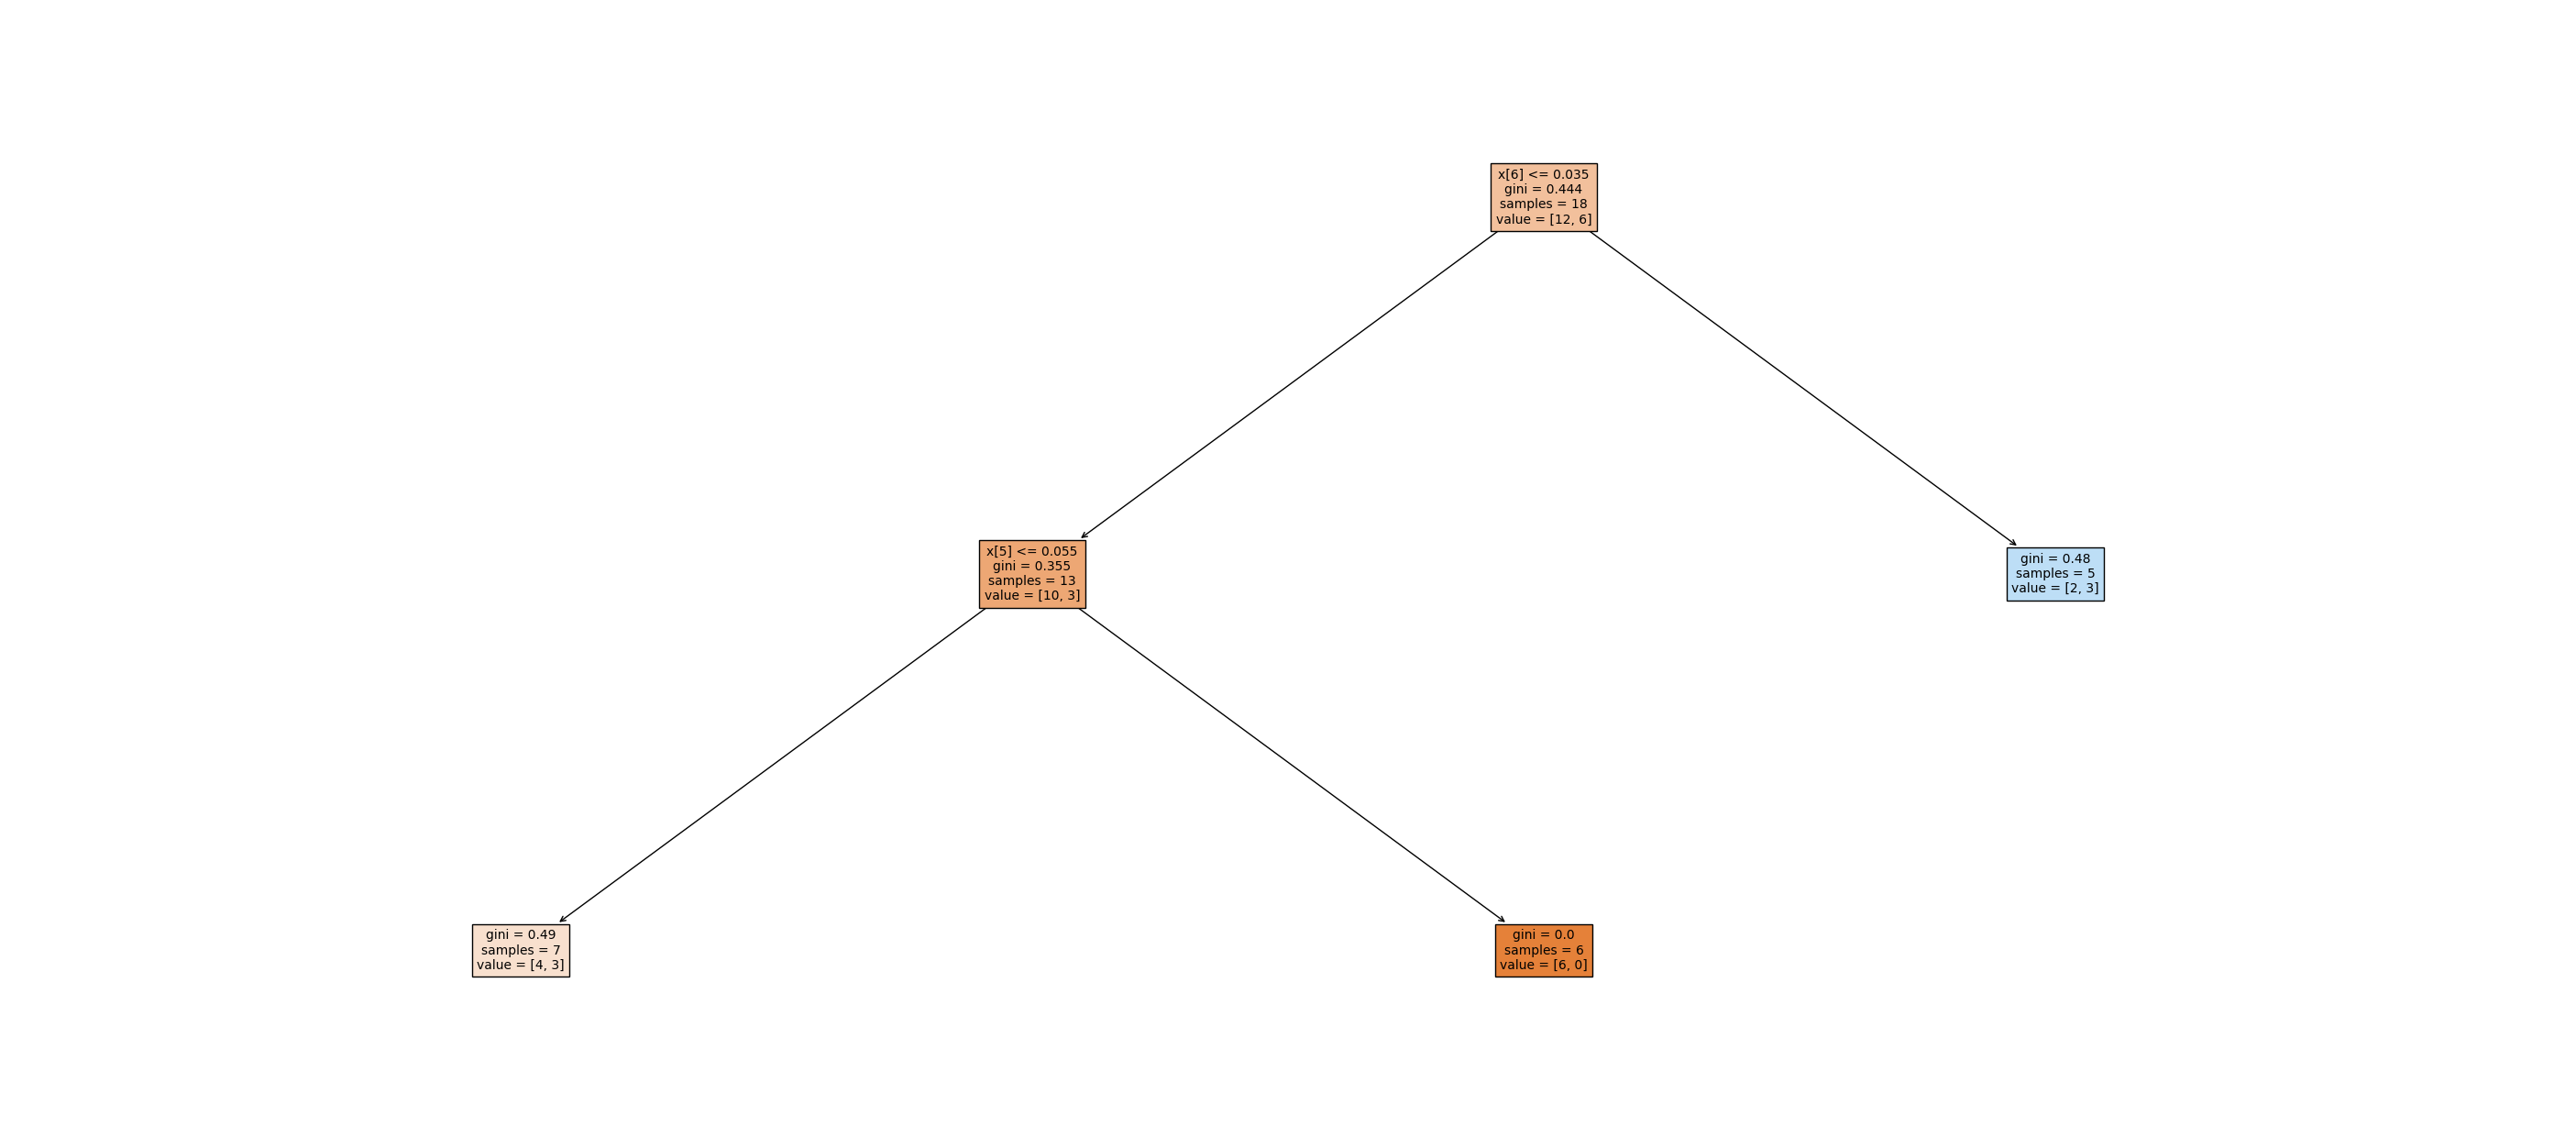

In [101]:
plt.figure(figsize=(36,16))
tree.plot_tree(dtc_plot, filled=True, fontsize=10)

Затем происходит использование метрик с гиперпараметрами по заданию, и производится анализ точности данных предсказанний и их исходов с помощью выведенных данных на тепловой карты из прошлых практических работ. С помощью данной тепловой карты были следующие данные - ~68 раза было предсказно правильно, что будет не нужный жанр и 7 раз, что он нужный. ~20 раз было предсказно неправильно, что будет не нужный жанр и 16 раз, что он нужный.

Text(50.722222222222214, 0.5, 'Реально')

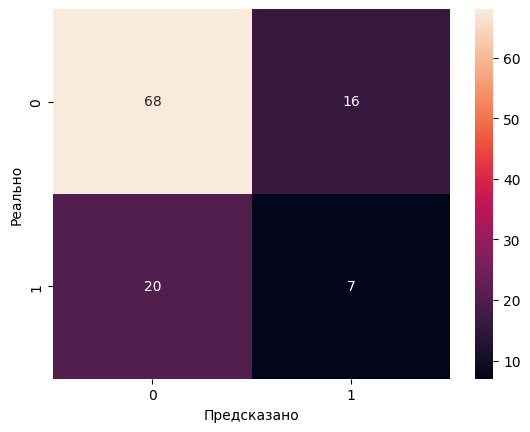

In [102]:
Y_predict = dtc.predict(x_test)
con_mat = metrics.confusion_matrix(y_test, Y_predict)
sns.heatmap(con_mat, annot=True, fmt="d")
plt.xlabel("Предсказано")
plt.ylabel("Реально")

С помощью метрики узнали следующие данные: (-)Точность - 68%,   представляет собой долю правильных предсказаний. (-)Чувствительность - 26%, правильно определяет около 26% фактических положительных случаев. (-)Аккуратность  - 30%, предсказанных положительных случаев являются правильными. (-) Финальная - 28%, баланс модели между точностью и чувствительностью.

In [103]:
print("Точность", metrics.accuracy_score(y_test, Y_predict))
print("Чувствительность", metrics.recall_score(y_test, Y_predict))
print("Аккуратность", metrics.precision_score(y_test, Y_predict))
print("Финальная", metrics.f1_score(y_test, Y_predict))

Точность 0.6756756756756757
Чувствительность 0.25925925925925924
Аккуратность 0.30434782608695654
Финальная 0.27999999999999997


Вывод: в ходе данного исследования можно выделить то, что быстрее по времени строится без гиперпараметров, но с ними в свою очередь выглядит достаточно удобно тем, что можно поставить какое-либо ограничение на те данные, которые тебе точно подойдут. Но как мне показалось при взятии одном и том же количестве данных до отбора, точность и чувствительность, аккуратность и финальность отличия вообще миниальны, а если они и есть, то в худшую сторону с гиперпараметрами, скорее всего из-за меньшего количества данных после отбора.